In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Wipro_dataset.csv')

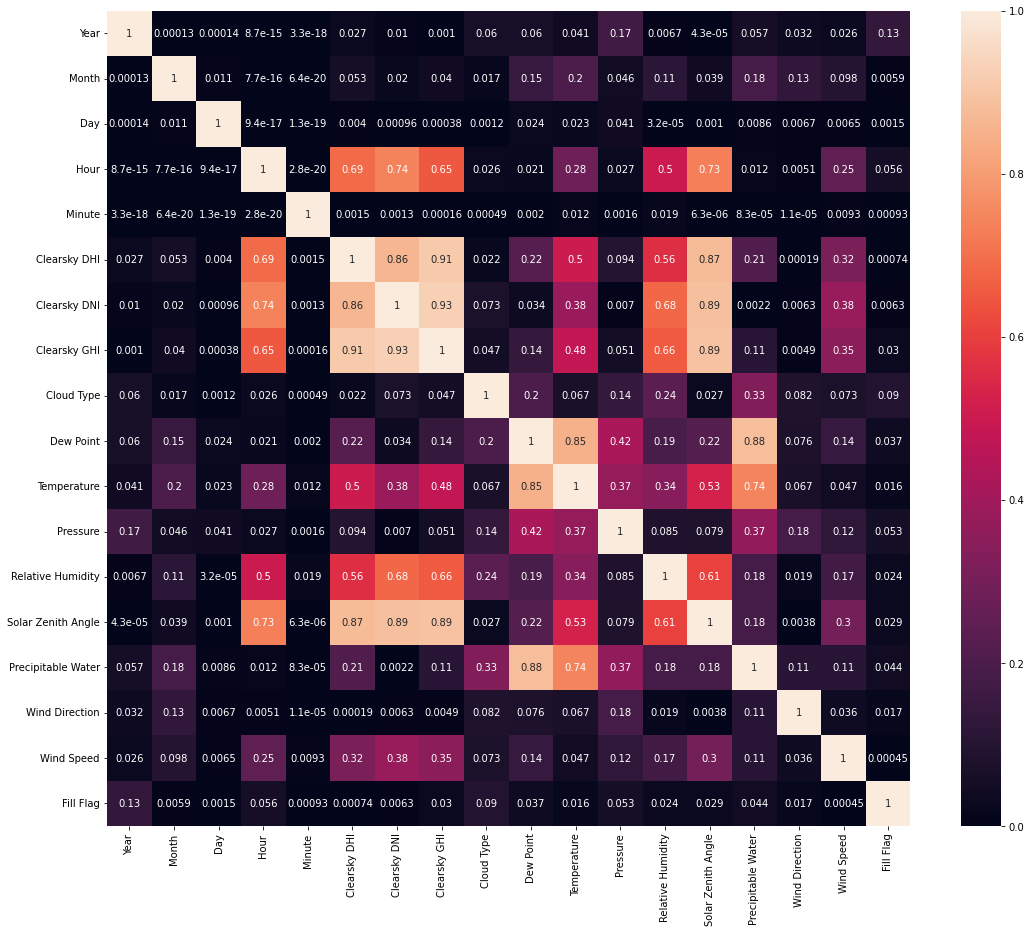

In [3]:
plt.figure(figsize=(18, 15))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [4]:
drop = ['Cloud Type', 'Wind Direction', 'Fill Flag', 'Clearsky GHI', 'Year', 'Month', 'Day', 'Minute']
data = data.drop(drop, axis = 1)
data.head()

,Hour,Clearsky DHI,Clearsky DNI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Speed
0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1
1,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,3.1
2,1,0,0,0.0,5.0,1010,78.27,118.50,0.482,3.2
3,1,0,0,0.0,4.0,1010,78.27,124.78,0.478,3.1
4,2,0,0,0.0,4.0,1010,76.45,131.12,0.475,3.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Hour                175296 non-null  int64  
 1   Clearsky DHI        175296 non-null  int64  
 2   Clearsky DNI        175296 non-null  int64  
 3   Dew Point           175296 non-null  float64
 4   Temperature         175296 non-null  float64
 5   Pressure            175296 non-null  int64  
 6   Relative Humidity   175296 non-null  float64
 7   Solar Zenith Angle  175296 non-null  float64
 8   Precipitable Water  175296 non-null  float64
 9   Wind Speed          175296 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 13.4 MB


In [6]:
data.columns = [ 'Hour','Clearsky_DHI', 'Clearsky_DNI', 'Dew_Point', 'Temperature','Pressure', 'Relative_Humidity', 'Solar_Zenith_Angle', 'Precipitable_Water', 'Wind_Speed']
data.head()

,Hour,Clearsky_DHI,Clearsky_DNI,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Wind_Speed
0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1
1,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,3.1
2,1,0,0,0.0,5.0,1010,78.27,118.50,0.482,3.2
3,1,0,0,0.0,4.0,1010,78.27,124.78,0.478,3.1
4,2,0,0,0.0,4.0,1010,76.45,131.12,0.475,3.0


In [7]:
data_DHI = data.drop(['Clearsky_DNI'], axis = 1)

In [8]:
data_DNI = data.drop(['Clearsky_DHI'], axis = 1)

In [9]:
data_DHI.head()

,Hour,Clearsky_DHI,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Wind_Speed
0,0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1
1,0,0,1.0,5.0,1010,80.81,112.28,0.490,3.1
2,1,0,0.0,5.0,1010,78.27,118.50,0.482,3.2
3,1,0,0.0,4.0,1010,78.27,124.78,0.478,3.1
4,2,0,0.0,4.0,1010,76.45,131.12,0.475,3.0


In [10]:
data_DNI.head()

,Hour,Clearsky_DNI,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Wind_Speed
0,0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1
1,0,0,1.0,5.0,1010,80.81,112.28,0.490,3.1
2,1,0,0.0,5.0,1010,78.27,118.50,0.482,3.2
3,1,0,0.0,4.0,1010,78.27,124.78,0.478,3.1
4,2,0,0.0,4.0,1010,76.45,131.12,0.475,3.0


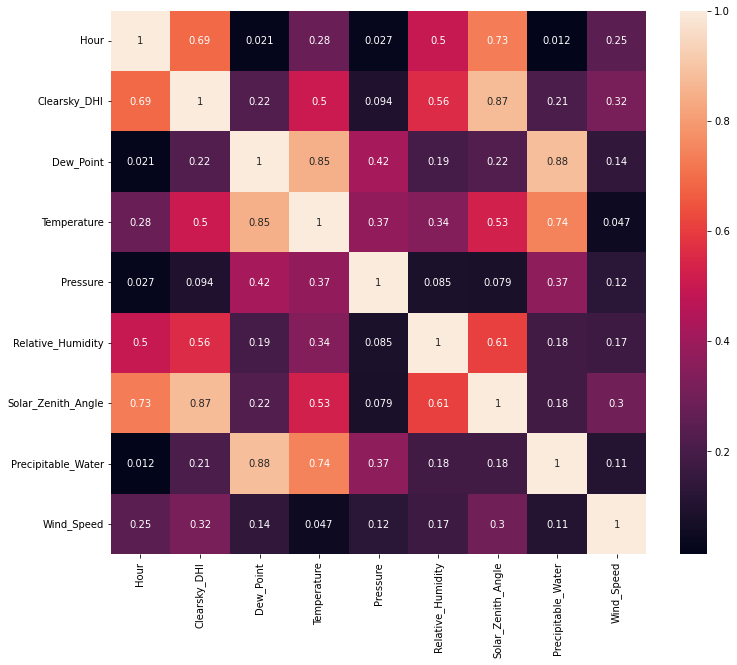

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_DHI.corr().abs(), annot=True)
plt.show()

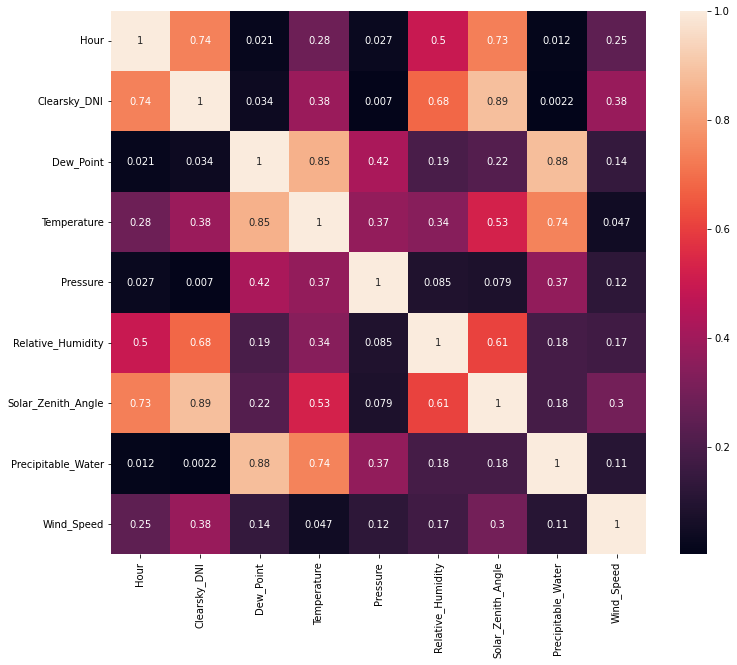

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_DNI.corr().abs(), annot=True)
plt.show()

In [13]:
data_DNI = data_DNI.drop(['Precipitable_Water', 'Pressure'], axis = 1)
data_DNI.head()

,Hour,Clearsky_DNI,Dew_Point,Temperature,Relative_Humidity,Solar_Zenith_Angle,Wind_Speed
0,0,0,0.0,5.0,75.34,106.15,3.1
1,0,0,1.0,5.0,80.81,112.28,3.1
2,1,0,0.0,5.0,78.27,118.50,3.2
3,1,0,0.0,4.0,78.27,124.78,3.1
4,2,0,0.0,4.0,76.45,131.12,3.0


In [14]:
data_DNI.shape

(175296, 7)

In [15]:
data_DHI.shape

(175296, 9)

In [16]:
X_DNI = data_DNI.drop(['Clearsky_DNI'], axis = 1)
X_DHI = data_DHI.drop(['Clearsky_DHI'], axis = 1)

y_DNI = data['Clearsky_DNI']
y_DHI = data['Clearsky_DHI']

In [17]:
from sklearn.model_selection import train_test_split
X_train_DNI, X_test_DNI, y_train_DNI, y_test_DNI = train_test_split(X_DNI, y_DNI, test_size = 0.25, random_state = 0)
X_train_DHI, X_test_DHI, y_train_DHI, y_test_DHI = train_test_split(X_DHI, y_DHI, test_size = 0.25, random_state = 0)

In [18]:
X_train_DHI.shape, y_train_DHI.shape

((131472, 8), (131472,))

In [19]:
X_train_DNI.shape, y_train_DNI.shape

((131472, 6), (131472,))

In [20]:
X_test_DHI.shape, y_test_DHI.shape

((43824, 8), (43824,))

## Simple Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model_1_1 = LinearRegression()
model_1_2 = LinearRegression()

model_1_1.fit(X_train_DNI, y_train_DNI)
model_1_2.fit(X_train_DHI, y_train_DHI)

LinearRegression()

In [22]:
prediction_DHI = model_1_2.predict(X_test_DHI)
prediction_DNI = model_1_1.predict(X_test_DNI)

print(r2_score(y_test_DNI,prediction_DNI)*100)
print(r2_score(y_test_DHI,prediction_DHI)*100)

84.78270260169299
78.04420051640129


## Rigde Regression

In [25]:
from sklearn.linear_model import Ridge

model_2_1 = Ridge()
model_2_2 = Ridge()

model_2_1.fit(X_train_DNI, y_train_DNI)
model_2_2.fit(X_train_DHI, y_train_DHI)

Ridge()

In [26]:
prediction_DHI = model_2_2.predict(X_test_DHI)
prediction_DNI = model_2_1.predict(X_test_DNI)

print(r2_score(y_test_DNI,prediction_DNI)*100)
print(r2_score(y_test_DHI,prediction_DHI)*100)

84.78270275750653
78.0442003261889


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
model_3_1 = RandomForestRegressor()
model_3_2 = RandomForestRegressor()

model_3_1.fit(X_train_DNI, y_train_DNI)
model_3_2.fit(X_train_DHI, y_train_DHI)


RandomForestRegressor()

In [23]:
from sklearn.metrics import r2_score
prediction_DHI = model_3_2.predict(X_test_DHI)
prediction_DNI = model_3_1.predict(X_test_DNI)

print(r2_score(y_test_DNI,prediction_DNI)*100)
print(r2_score(y_test_DHI,prediction_DHI)*100)

98.66393604493237
95.13198284553485


In [24]:
import pickle
file_name = 'Random_Forest_DNI.pkl'
pickle.dump(model_3_1, open(file_name,'wb'))


file_name = 'Random_Forest_DHI.pkl'
pickle.dump(model_3_2, open(file_name,'wb'))

## Polynomial Features


In [45]:
from sklearn.preprocessing import PolynomialFeatures

model_4 = PolynomialFeatures(degree = 5, order = 'F')

X_train_DNI_poly = model_4.fit_transform(X_train_DNI)
X_train_DHI_poly = model_4.fit_transform(X_train_DHI)
X_test_DNI_poly = model_4.fit_transform(X_test_DNI)
X_test_DHI_poly = model_4.fit_transform(X_test_DHI)

model_1_1.fit(X_train_DNI_poly, y_train_DNI)
model_1_2.fit(X_train_DHI_poly, y_train_DHI)

LinearRegression()

In [46]:
poly_pred_DHI = model_1_2.predict(X_test_DHI_poly)
poly_pred_DNI = model_1_1.predict(X_test_DNI_poly)

print(r2_score(y_test_DNI,poly_pred_DNI)*100)
print(r2_score(y_test_DHI,poly_pred_DHI)*100)

97.27168833146536
93.05058491420549


## MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

model_5_1 = MLPRegressor()
model_5_2 = MLPRegressor()

model_5_1.fit(X_train_DNI, y_train_DNI)
model_5_2.fit(X_train_DHI, y_train_DHI)

C:\Users\ameya\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [52]:
prediction_DHI = model_5_2.predict(X_test_DHI)
prediction_DNI = model_5_1.predict(X_test_DNI)

print(r2_score(y_test_DNI,prediction_DNI)*100)
print(r2_score(y_test_DHI,prediction_DHI)*100)

98.14897196677701
92.56120569867564


## KNN Regression

In [36]:
from sklearn.neighbors import KNeighborsRegressor as KNNr

model_11_1 = KNNr(n_neighbors = 101)
model_11_2 = KNNr(n_neighbors = 101)

model_11_1.fit(X_train_DNI, y_train_DNI)
model_11_2.fit(X_train_DHI, y_train_DHI)

KNeighborsRegressor(n_neighbors=401)

In [37]:
prediction_DHI = model_11_2.predict(X_test_DHI)
prediction_DNI = model_11_1.predict(X_test_DNI)

print(r2_score(y_test_DNI,prediction_DNI)*100)
print(r2_score(y_test_DHI,prediction_DHI)*100)

98.24843508311207
92.113029704529


## Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

model_14_1 = GradientBoostingRegressor(n_estimators = 500)
model_14_2 = GradientBoostingRegressor(n_estimators = 500)

model_14_1.fit(X_train_DNI, y_train_DNI)
model_14_2.fit(X_train_DHI, y_train_DHI)

GradientBoostingRegressor(n_estimators=500)

In [26]:
prediction_DHI = model_14_2.predict(X_test_DHI)
prediction_DNI = model_14_1.predict(X_test_DNI)

print(r2_score(y_test_DNI,prediction_DNI)*100)
print(r2_score(y_test_DHI,prediction_DHI)*100)

98.58488061119466
94.06143647189491
